# Classification Problem

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical
from keras import regularizers

In [ ]:
# Access to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Load Dataset

In [ ]:
# Read dataset from google drive
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/breast-cancerData.csv')
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df.shape

(699, 11)

## Preprocess

In [ ]:
# Check for missing data and drop them
df.dropna()
df.shape

(699, 11)

In [ ]:
# Delete the first column (ID)
del df['0']
df.head(5)

,1,2,3,4,5,6,7,8,9,10
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


### Separate features and label

In [ ]:
# seperate the target column
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X.head(5)

,1,2,3,4,5,6,7,8,9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [ ]:
y.head(5)

0    2
1    2
2    2
3    2
4    2
Name: 10, dtype: int64

### Change label values to 0/1

In [ ]:
y.unique()

array([2, 4])

In [ ]:
y = y.replace([2, 4], [0, 1])
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: 10, dtype: int64

In [ ]:
y.unique()

array([0, 1])

In [ ]:
# y = to_categorical(y)
# y

### Split data to test/train

In [ ]:
# Split test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (468, 9)
y_train dataset:  (468,)
X_test dataset:  (231, 9)
y_test dataset:  (231,)


### Normalize data

In [ ]:
X_train_scaled = X_train.copy()

# Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation
for column in X_train_scaled.columns:
    X_train_scaled[column] = (X_train_scaled[column] - X_train[column].mean()) / X_train[column].std()

X_train_scaled.head(5)

,1,2,3,4,5,6,7,8,9
568,1.217114,0.263176,0.253797,-0.651484,1.227228,0.148049,-0.615998,0.701137,0.216425
390,-1.192110,-0.704100,-0.747133,-0.308521,-0.550923,0.147427,-0.615998,-0.610081,-0.349423
38,0.184589,0.263176,0.253797,2.092224,-0.550923,0.148049,0.633801,1.028942,-0.349423
547,-0.847935,-0.704100,-0.747133,-0.651484,-0.995460,0.147427,-1.032597,-0.610081,-0.349423
294,-1.192110,-0.704100,-0.747133,-0.651484,-0.550923,-6.760335,-0.615998,-0.610081,-0.349423


In [ ]:
X_test_scaled = X_test.copy()

# Each standardized value is computed by subtracting the mean of the corresponding feature then dividing by the quality deviation
for column in X_test_scaled.columns:
    X_test_scaled[column] = (X_test_scaled[column] - X_train[column].mean()) / X_train[column].std()

X_test_scaled.head(5)

,1,2,3,4,5,6,7,8,9
300,1.217114,0.263176,2.255656,0.720370,0.338153,0.147634,1.467000,2.340160,-0.349423
394,-1.192110,-0.381674,-0.079846,-0.651484,-0.550923,0.147427,-0.615998,-0.610081,-0.349423
606,-0.159585,-0.704100,-0.747133,-0.308521,-0.550923,0.147427,-1.032597,-0.610081,-0.349423
371,-1.192110,-0.704100,-0.079846,-0.651484,-0.550923,0.147427,-1.032597,-0.610081,-0.349423
493,0.184589,2.197728,2.255656,2.435187,1.227228,0.148049,1.050401,0.701137,0.216425


## MLP

In [ ]:
def design_model():
  # Architecture
  model = models.Sequential()
  ## 4 hidden layers
  model.add(layers.Dense(256, activation='relu', input_shape=(9,)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  model.add(layers.Dense(16, activation='relu'))
  ## output layer
  model.add(layers.Dense(1, activation='sigmoid'))

  # Compilation
  sgd = SGD(lr=0.008)
  model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
# Validation set as a part of trainset
X_val = X_train_scaled[:200]
partial_X_train = X_train_scaled[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [ ]:
model = design_model()
history = model.fit(partial_X_train, partial_y_train, epochs=55, batch_size=1, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/55
268/268 [==============================] - 5s 9ms/step - loss: 0.5675 - accuracy: 0.8097 - val_loss: 0.3629 - val_accuracy: 0.9200
Epoch 2/55
268/268 [==============================] - 2s 6ms/step - loss: 0.2010 - accuracy: 0.9590 - val_loss: 0.0971 - val_accuracy: 0.9800
Epoch 3/55
268/268 [==============================] - 2s 6ms/step - loss: 0.0984 - accuracy: 0.9664 - val_loss: 0.0634 - val_accuracy: 0.9850
Epoch 4/55
268/268 [==============================] - 1s 5ms/step - loss: 0.0778 - accuracy: 0.9776 - val_loss: 0.0497 - val_accuracy: 0.9850
Epoch 5/55
268/268 [==============================] - 2s 7ms/step - loss: 0.0706 - accuracy: 0.9776 - val_loss: 0.0537 - val_accuracy: 0.9850
Epoch 6/55
268/268 [==============================] - 2s 7ms/step - loss: 0.0667 - accuracy: 0.9776 - val_loss: 0.0498 - val_accuracy: 0.9850
Epoch 7/55
268/268 [==============================] - 4s 15ms/step - loss: 0.0643 - accuracy: 0.9739 - val_loss: 0.0509 - val_accuracy: 0.9850
Epoch

In [ ]:
test_crossentropy, test_accuracy = model.evaluate(X_test_scaled, y_test)
print('Loss of testset (Cross Entropy):', test_crossentropy)
print('Metric of testset (Accuracy):', test_accuracy)

8/8 [==============================] - 0s 3ms/step - loss: 0.4493 - accuracy: 0.9177
Loss of testset (Cross Entropy): 0.4493444263935089
Metric of testset (Accuracy): 0.9177489280700684


## Plot Loss and Accuracy of train/validation

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

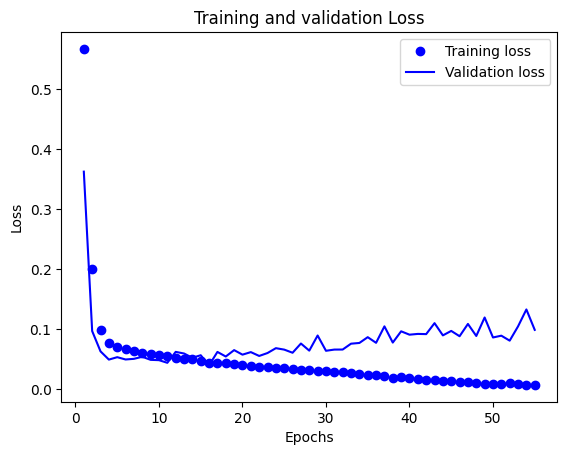

In [ ]:
# Plot training and validation Loss

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(train_loss_values)+1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

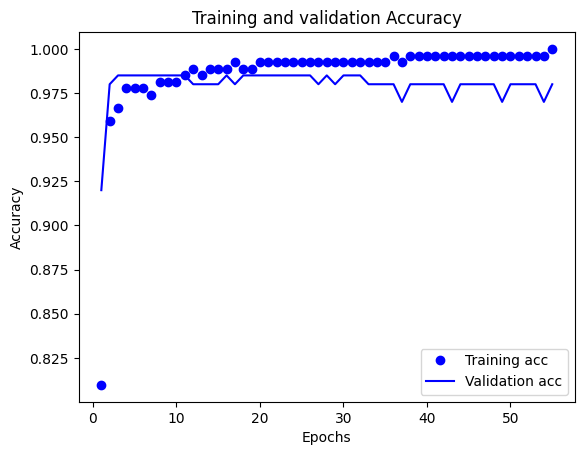

In [ ]:
# Plot training and validation Accuracy

train_acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(train_acc_values)+1)

plt.plot(epochs, train_acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**It seems that best epoch for this problem is 5**

## Add Regularization

In [ ]:
def design_model_regularized():
  # Architecture
  model = models.Sequential()
  ## 4 hidden layers
  model.add(layers.Dense(256, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(9,)))
  model.add(layers.Dense(64, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.001), activation='relu'))
  ## output layer
  model.add(layers.Dense(1, activation='sigmoid'))

  # Compilation
  sgd = SGD(lr=0.008)
  model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
regularized_model = design_model_regularized()
history_reg = regularized_model.fit(partial_X_train, partial_y_train, epochs=55, batch_size=1, validation_data=(X_val, y_val))

Epoch 1/55


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


268/268 [==============================] - 2s 4ms/step - loss: 1.8397 - accuracy: 0.9291 - val_loss: 1.5791 - val_accuracy: 0.9850
Epoch 2/55
268/268 [==============================] - 1s 4ms/step - loss: 1.5530 - accuracy: 0.9664 - val_loss: 1.4728 - val_accuracy: 0.9850
Epoch 3/55
268/268 [==============================] - 1s 5ms/step - loss: 1.4851 - accuracy: 0.9739 - val_loss: 1.4242 - val_accuracy: 0.9900
Epoch 4/55
268/268 [==============================] - 1s 5ms/step - loss: 1.4364 - accuracy: 0.9739 - val_loss: 1.3818 - val_accuracy: 0.9900
Epoch 5/55
268/268 [==============================] - 1s 5ms/step - loss: 1.3910 - accuracy: 0.9776 - val_loss: 1.3475 - val_accuracy: 0.9800
Epoch 6/55
268/268 [==============================] - 1s 5ms/step - loss: 1.3497 - accuracy: 0.9739 - val_loss: 1.3063 - val_accuracy: 0.9900
Epoch 7/55
268/268 [==============================] - 1s 3ms/step - loss: 1.3093 - accuracy: 0.9776 - val_loss: 1.2593 - val_accuracy: 0.9950
Epoch 8/55
268/26

In [ ]:
test_crossentropy, test_accuracy = regularized_model.evaluate(X_test_scaled, y_test)
print('Loss of testset (Cross Entropy):', test_crossentropy)
print('Metric of testset (Accuracy):', test_accuracy)

8/8 [==============================] - 0s 3ms/step - loss: 0.4394 - accuracy: 0.9177
Loss of testset (Cross Entropy): 0.4393720328807831
Metric of testset (Accuracy): 0.9177489280700684


## Plots after Regularization

In [ ]:
history_reg_dict = history_reg.history

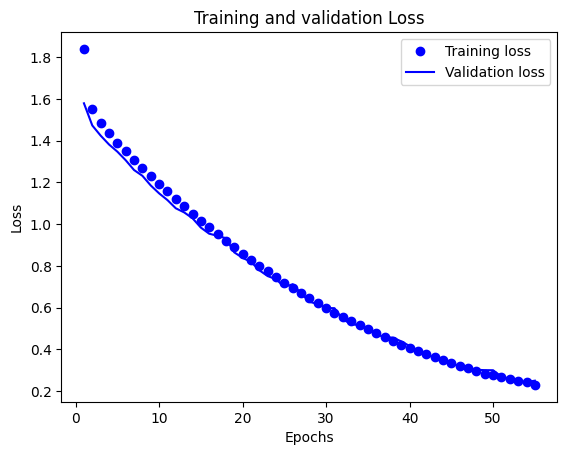

In [ ]:
# Plot training and validation Loss

train_loss_values = history_reg_dict['loss']
val_loss_values = history_reg_dict['val_loss']
epochs = range(1, len(train_loss_values)+1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

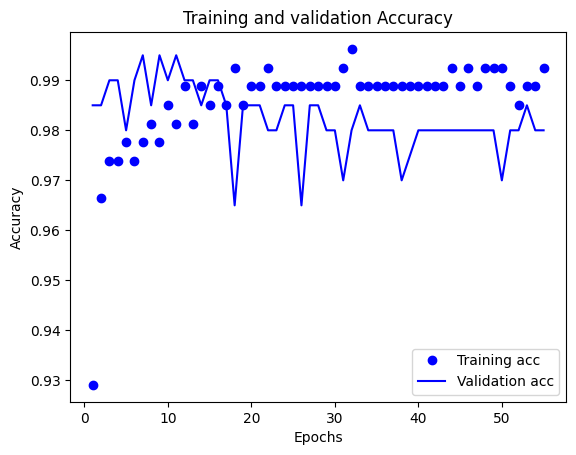

In [ ]:
# Plot training and validation Accuracy

train_acc_values = history_reg_dict['accuracy']
val_acc_values = history_reg_dict['val_accuracy']
epochs = range(1, len(train_acc_values)+1)

plt.plot(epochs, train_acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()